In [1]:
# pip install tensorflow

In [41]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import to_categorical
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
# Forward Propagation
input_data =  np.array([2,3])
weights ={'node_0': np.array([1,1]), 'node_1':np.array([-1,1]), 'output': np.array([2,-1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value,node_1_value])
print(hidden_layer_values)

output = (hidden_layer_values * weights['output']).sum()
print(output)


[5 1]
9


In [4]:
# Activation Function
#allows the hidden layers to capture non-linearity

input_data =  np.array([-1,2])
weights ={'node_0': np.array([3,3]), 'node_1':np.array([1,5]), 'output': np.array([2,-1])}
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])
output = (hidden_layer_outputs * weights['output']).sum()

print(output)


0.9901095378334199


In [5]:
# ReLU - rectified linear activation
# 0 if x<0 and x if x>=0

def relu(input):
    output = max(0, input)
    return(output)

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])

model_output = (hidden_layer_outputs * weights['output']).sum()

print(model_output)

-3


In [6]:
def predict_with_network_1(input_data_row, weights):
    node_0_input = (input_data_row * weights['node_0']).sum() 
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)
    

In [7]:
results = []

input_data = [np.array([3,5]),np.array([1,-1]),np.array([0,0]),np.array([8,4])]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

for input_data_row in input_data:
    results.append(predict_with_network_1(input_data_row, weights))
    
print(results)  

[52, 63, 0, 148]


In [8]:
# Deeper Networks - Multiple hidden layers
# internally build representations of patterns in the data
# partially replace the need for feature engineering
# subsequent layers build increasingly sophisticated representations of raw data

# Modeler doesn't need to specify the interactions
# when the model is trained, the neural network gets weights that find relevant patterns to make better predictions




In [9]:
weights = {'node_0_0': np.array([2, 4]), 'node_0_1': np.array([ 4, -5]), 'node_1_0': np.array([-1,  2]), 'node_1_1': np.array([1, 2]), 'output': np.array([2, 7])}


def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

input_data = np.array([3,5])
output = predict_with_network(input_data)
print(output)

182


# Optimization

In [10]:
# loss function aggregates errors in predictions from data points into single number
# it predicts model's predictive performance
# common loss function is MSE
# lower loss - better model
# goal - finding weights that give the lowest value for the loss function
# this is done using an algorithm called "Gradient descent"

# "How Gradient Descent works"
# 1. Start at a random point
# 2. Until you rae somewhat flat, 
    # find the slope
    # take a step downhill


In [11]:
input_data = np.array([0, 3])

weights_0 = {'node_0': [2, 1],'node_1': [1, 2],'output': [1, 1]}

target_actual = 3

model_output_0 = predict_with_network_1(input_data, weights_0)

error_0 = model_output_0 - target_actual

weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

model_output_1 = predict_with_network_1(input_data, weights_1)

error_1 = target_actual - model_output_1

print(error_0)
print(error_1)

6
0


In [12]:
target_actuals = np.array([1, 3, 5, 7])
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

model_output_0 = []
model_output_1 = []

for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network_1(row,weights_0 ))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network_1(row,weights_1 ))
    

mse_0 = mean_squared_error(target_actuals, model_output_0)

mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


In [13]:
# Gradient descent
# if slope is positive, going opposite the slope - moving to lower numbers
# subtract the slope from the current value
# too big a step might lead us astray

# instead of subtracting the slope, we multiply it by a small number called 'learning rate'
# then update each weight by subtracting learning rate * slope

# Slope calculation Eg
# 3-----2----->6  ;  3 & 6 nodes ; 2 - weight; actual target =10 
# To calculate the slope for a weight, need to multiply 3 things
#     slope of loss fun wrt value at node we feed into(the model's prediction)
#         2(Predicted value - Actual Value) = 2 (6 - 10) = -8
#     value at the node that feeds into our weight
#         3
#     slope of activation fun wrt value we feed into
#         we don't have activation function in this case

# Multiplying the three(two) -> -8 * 3 = -24(slope of the loss)
# If learning rate = 0.01; new weight would be 2-(0.01 * -24 ) = 2.24

In [14]:
# Network with two inputs affecting prediction

# 3 & 4 - nodes; 1 & 2 - weights 

# 3
#  * 
#   1
#    *
#     *
#    *
#   2
#  *  
# 4

weights = np.array([1,2])
input_data = np.array([3,4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds- target
print(error)

5


In [15]:
gradient = 2 * input_data*error
print(gradient)

[30 40]


In [16]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


In [17]:

weights = np.array([0,2,1])
input_data = np.array([1,2,3])
target = 0

preds = (weights * input_data).sum()
error = preds - target
slope = 2 * input_data * error

print("Slope : ",slope)

learning_rate = 0.01
weights_updated = weights - learning_rate*slope
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target

print("error : ",error)
print("error_updated : ",error_updated)


Slope :  [14 28 42]
error :  7
error_updated :  5.04


In [18]:
# # Making multiple updates to weights
# n_updates = 20
# mse_hist = []

# def get_slope(input_data, target, weights):
#     preds = (weights * input_data).sum()
#     error = preds - target
#     slope = 2 * input_data * error
#     return slope

# def get_mse(input_data, target, weights):
# #     model_output = []
# #     for row in input_data:
# #         model_output.append(predict_with_network_1(row,weights))
#     model_output = (input_data*weights).sum()
#     mse = mean_squared_error(target, model_output)
#     return mse
    

# n_updates = 20
# mse_hist = []

# # Iterate over the number of updates
# for i in range(n_updates):
#     # Calculate the slope: slope
#     slope = get_slope(input_data, target, weights)
    
#     # Update the weights: weights
#     weights = weights - slope * 0.01
    
#     # Calculate mse with new weights: mse
#     mse = get_mse(input_data, target, weights)
    
#     # Append the mse to mse_hist
#     mse_hist.append(mse)

# # Plot the mse history
# plt.plot(mse_hist)
# plt.xlabel('Iterations')
# plt.ylabel('Mean Squared Error')
# plt.show()

In [19]:
# Backpropagation
# takes the error from the o/p layer and propagates it backwards through the hidden layerstowards the input layer

# allows gradient descent to update all weights in neural network (by getting gradients for all weights)
# comes from chain rule of calculus

# we are trying to estimate the slope of the loss function w.r.t each weight
# Do fwd propagation to calculate predictions nad errors before we do back propagation

# In back propagation, we go back one layer at a time and Gradients for weight is product of
#     node value feeding into that weight
#     slope of loss fun w.r.t node it feeds into
#     slope of activation fun at the node it feeds into


In [20]:
# Backpropagation
# use fwd propagation to make prediction
# use back propagation to calculate the slope of the loss fun w.r.t each weight
# multiply that slope by the learning rate and subtract from the current weights
# keep going with that cycle until we get to a flat part 


# Stochastic gradient descent
# for computational efficiency, it's common to calculate slopes on only a subset of the data(a batch)
# start over from the beginning once all data is used
# each time through the full training data is called epoch (1st, 2nd, 3rd,.. epoch)
# when slopes are calulated on one batch at a time rather than on full data : stochastic gradient descent



# Building DL models with keras 

In [21]:
# Keras workflow has 4 steps
#     specify architecture(no layers, no nodes in layers, activation funs, ..)
#     compile(loss function, optimization, ..)
#     fit(back propagation and optimization of model weights)
#     predict

In [22]:
# Model specification
predictors = np.loadtxt('hourly_wages.csv', delimiter=',', skiprows=1)[:,1:]
n_cols = predictors.shape[1]
target = np.loadtxt('hourly_wages.csv', delimiter=',', skiprows=1, usecols=0)

print(n_cols)
model = Sequential()

# first layer
model.add(Dense(100, activation='relu',input_shape = (n_cols,)))

# second layer
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(1))


9


In [23]:
# Compiling model

# we can specify optimizer(Usually "Adam") and loss function(could be MSE)

model.compile(optimizer='adam', loss='mean_squared_error')

print("Loss function: " + model.loss)

# Fitting model

# applying backpropagation and gradient descent with your data to update weights
# scaling data before fitting can ease optimization
#     one common approach - subtract each feature by that features mean and divide it by its standard deviation

model.fit(predictors, target)



Loss function: mean_squared_error
17/17 [==============================] - 0s 2ms/step - loss: 66.7050


In [24]:
# Classification Models

# we do couple of things differently from regression in DL
#     set loss function as categorical_crossentropy(lower score - beeter) instead of mse
#         add metrics= accuracy to compile step for easy-to-understand diagnosis
#     output layer has separate node for each possible o/come, and uses 'softmax' activation

data =  pd.read_csv('titanic_all_numeric.csv')
data["age_was_missing"] = data["age_was_missing"].astype(int)
predictors =  data.drop(['survived'], axis=1).values
target = to_categorical(data['survived'])

n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation= 'softmax'))

model.compile(optimizer='sgd', loss= 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(predictors, target)





28/28 [==============================] - 0s 594us/step - loss: 1.3334 - accuracy: 0.6285


In [25]:
# Using models
#     save, reload and use the model

model.save('model_file.h5')
my_model = load_model('model_file.h5')

data_to_predict_with = predictors[23:40, :]

predictions = my_model.predict(data_to_predict_with)
probability_true = predictions[:, 1]

print(probability_true)
# verifying model structure
my_model.summary()


1/1 [==============================] - 0s 57ms/step
[0.46185616 0.5561937  0.20935412 0.12048928 0.99962246 0.12239509
 0.12330358 0.22399366 0.98075897 0.12264533 0.01601755 0.8867909
 0.43400422 0.12048616 0.20979638 0.38624415 0.36940596]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1100      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 2)                 202       
                                                                 
Total params: 21,502
Trainable params: 21,502
Non-trainable params: 0
______

# Fine-tuning Keras models

In [26]:
# Why optimization is hard

# How to to choose architecture and model optimization arguments
# optimization of a single weight is hard since we'll be optimizing many weights at once with complex r/ships
# updates may not improve model meaningfully
# updates too small(if learning rate is low) or too large (if learning rate is high)

# Easiest way to see effect of d/t learning rates is to use the simplest optimiser - the stochastic gradient descent(sgd)
#     sgd uses fixed learning rate - 0.01 are common
#     we can still specify that with lr argument


In [30]:
input_shape = (n_cols,)

def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

lr_to_test = [0.000001, 0.1, 1]

for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr = lr)
    model.compile(optimizer = my_optimizer, loss= 'categorical_crossentropy')
    model.fit(predictors, target)
    


28/28 [==============================] - 0s 672us/step - loss: 1.5663


28/28 [==============================] - 0s 593us/step - loss: 1.4907


28/28 [==============================] - 0s 1ms/step - loss: 1.6738


In [31]:
# dying neuron problem 
#     once node starts getting -ve in relu, it'll be 0 even when fed into other neurons

# vanishing gradient problem
#     occurs when many layers have very small slopes(eg. due to being flat on part of tanh curve)
#     In deep networks, updates to backprop were close to 0

# The above cases could cause the model not to train better
#     the solution could be changing the activation function

In [33]:
# Model Validation

# we use validation data
#     data explicitly held out from training, and used onlt to test model performance

model.compile(optimizer = my_optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

model.fit(predictors, target, validation_split=0.3)



20/20 [==============================] - 0s 8ms/step - loss: 1.0039 - accuracy: 0.6292 - val_loss: 0.5778 - val_accuracy: 0.6604


In [34]:
# goal is to have best validation score possible so we keep training while validation score is
# improving and stop training when the score isn't improving
#     we do this with EarlyStopping 

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20, callbacks=[early_stopping_monitor])


# We can experiment with model with
#     kd/t architectures, more layers, fewer layers, layers with more nodes, layers with fewer nodes
    
    

Epoch 1/20
20/20 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6742 - val_loss: 0.6497 - val_accuracy: 0.6530
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.6485 - val_loss: 0.7439 - val_accuracy: 0.6381
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6645 - val_loss: 0.5993 - val_accuracy: 0.7276
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.6645 - val_loss: 0.5788 - val_accuracy: 0.6978
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6822 - val_loss: 0.7218 - val_accuracy: 0.6418
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6838 - val_loss: 0.5342 - val_accuracy: 0.7575
Epoch 7/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6774 - val_loss: 0.5576 - val_accuracy: 0.7500
Epoch 8/20
20/20 [==

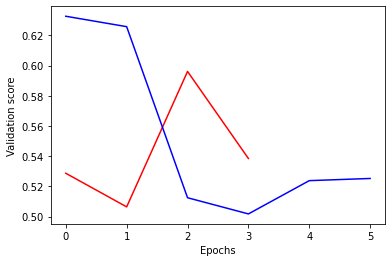

In [38]:
# Exp'ting with wider networks
early_stopping_monitor = EarlyStopping(patience=2)

model_2 = Sequential()

model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100,activation='relu'))

model_2.add(Dense(2,activation='softmax'))

model_2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Fit model_1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

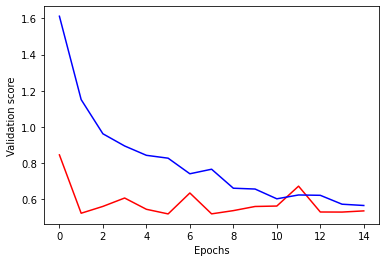

In [39]:
# Exp'menting with more layers

# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(10, activation ='relu', input_shape=input_shape))
model_2.add(Dense(10, activation ='relu'))
model_2.add(Dense(10, activation ='relu'))

# Add the output layer
model_2.add(Dense(2, activation ='softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [40]:
# Model Capacity

# Considerations to think about when deciding what models to try
# Model/ Network Capacity
#     closely related to terms overfitting and underfitting
#     model capacity is model's ability to capture predictive patterns in our data
#         larger layers, wider networks cause this

# start with small network
# gradually increase capacity
# keep increasing capacity until validation score is no longer improving


In [64]:
# Recognizing hadwritten digits

# 28 x 28 grid flattened to 784 values for each image
# Value in each part of array denotes darkness of that pixel

# taking the 784 features for each image as i/p and predicting  digits from among 10 possible values

(train_X, train_y), (test_X, test_y) = mnist.load_data()

X = train_X[:1000].reshape(1000,28,28)
y = train_y[:1000].reshape(1000)
print(str(X.shape))
# print(str(train_X.shape))
# print(str(train_y.shape))

# Create the model: model
model = Sequential()

# input_shape=(x_train.shape[1],)

#
# model.add(Dense(50, activation = 'relu', input_shape = (784,)))
model.add(Dense(50, activation = 'relu', input_shape = (X.shape[1],)))


# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# Fit the model
# model.fit(X, y, validation_split = 0.3, epochs=10)



(1000, 28, 28)
